In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import glob
%matplotlib inline

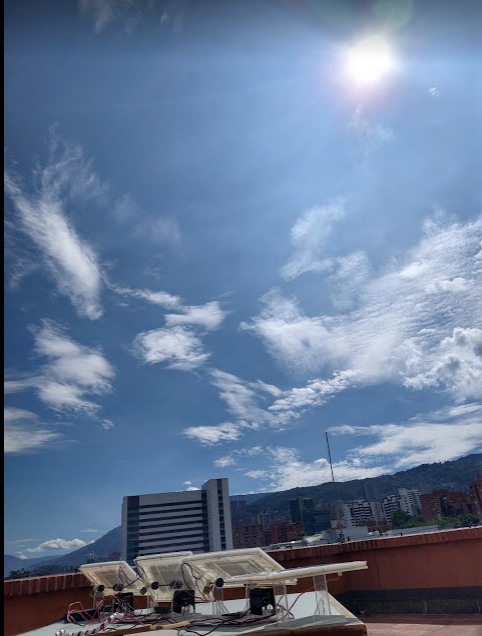

In [ ]:
from google.colab import files
files.upload()
test1 = pd.read_csv('DATALOG19082021.CSV',delimiter=',',encoding='utf-8')
time_datalog = pd.to_datetime(test1['Data'])
test1

Saving DATALOG19082021.CSV to DATALOG19082021.CSV


,Data,Voc_cell1_CT,Isc_cell1_CT,Voc_cell2_2P,Isc_cell2_2P,Voc_cell3_4P,Isc_cell3_4P,Voc_cell4_Fix,Isc_cell4_Fix
0,06:45:27 19/08/2021,0.941,0.038,0.945,0.034,0.945,0.027,1.001,0.075
1,06:46:27 19/08/2021,0.945,0.042,0.951,0.038,0.971,0.036,1.001,0.065
2,06:47:27 19/08/2021,0.969,0.060,0.972,0.063,0.998,0.073,1.005,0.085
3,06:48:27 19/08/2021,0.970,0.063,0.973,0.065,0.999,0.076,1.007,0.087
4,06:49:27 19/08/2021,0.970,0.065,0.973,0.068,1.000,0.081,1.007,0.094
...,...,...,...,...,...,...,...,...,...
641,17:26:16 19/08/2021,1.110,1.189,1.103,1.231,1.115,1.208,1.063,0.330
642,17:27:16 19/08/2021,1.113,1.280,1.106,1.343,1.117,1.313,1.063,0.332
643,17:28:16 19/08/2021,1.120,1.460,1.113,1.557,1.124,1.513,1.064,0.344
644,17:29:16 19/08/2021,1.120,1.449,1.111,1.556,1.122,1.509,1.063,0.329


In [ ]:
#test1['Isc_cell1_CT'] =  np.round(test1['Isc_cell1_CT'] + np.abs(np.min(test1['Isc_cell1_CT'])),3)
#test1['Isc_cell2_2P'] = np.round(test1['Isc_cell2_2P'] + np.abs(np.min(test1['Isc_cell2_2P'])),3)
#test1['Isc_cell3_4P'] =  np.round(test1['Isc_cell3_4P'] + np.abs(np.min(test1['Isc_cell3_4P'])),3)
#test1['Isc_cell4_Fix'] = np.round(test1['Isc_cell4_Fix'] + np.abs(np.min(test1['Isc_cell4_Fix'])),3)
test1

,Data,Voc_cell1_CT,Isc_cell1_CT,Voc_cell2_2P,Isc_cell2_2P,Voc_cell3_4P,Isc_cell3_4P,Voc_cell4_Fix,Isc_cell4_Fix
0,07:05:24 24/08/2021,1.007,-0.227,1.003,0.094,0.996,-0.014,1.017,0.072
1,07:06:24 24/08/2021,1.023,0.047,1.014,0.051,1.012,0.032,1.021,0.083
2,07:07:24 24/08/2021,1.008,-0.143,1.002,-0.128,1.001,-0.106,1.023,-0.022
3,07:08:24 24/08/2021,1.006,-0.101,1.000,-0.118,0.998,-0.099,1.020,-0.024
4,07:09:24 24/08/2021,1.004,-0.142,0.999,-0.139,0.996,-0.148,1.015,-0.094
...,...,...,...,...,...,...,...,...,...
617,17:26:24 24/08/2021,0.927,0.013,0.884,0.011,0.864,0.013,0.921,0.017
618,17:27:24 24/08/2021,0.926,0.011,0.881,0.010,0.862,0.014,0.920,0.015
619,17:28:24 24/08/2021,0.924,0.011,0.879,0.010,0.859,0.013,0.920,0.014
620,17:29:24 24/08/2021,0.923,0.013,0.876,0.011,0.856,0.014,0.919,0.016


In [ ]:
test1.to_csv('DATALOG09082021_.CSV',float_format='%.3f')

<Figure size 432x288 with 0 Axes>

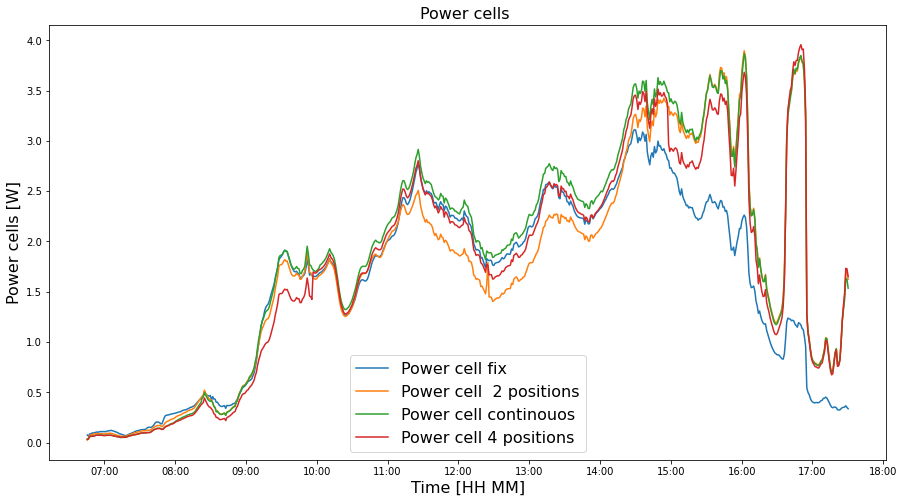

In [ ]:

test1['Pot_cell1_CT'] = test1['Voc_cell1_CT']*test1['Isc_cell1_CT']
test1['Pot_Cell2_4P'] = test1['Voc_cell2_2P']*test1['Isc_cell2_2P']
test1['Pot_Cell3_2P'] = test1['Voc_cell3_4P']*test1['Isc_cell3_4P']
test1['Pot_Cell4_Fix'] = test1['Voc_cell4_Fix']*test1['Isc_cell4_Fix']

#test1['Pot_cell1_CT'] = test1['Voc_cell1_CT']*np.abs(test1['Isc_cell1_CT'])
#test1['Pot_Cell2_4P'] = test1['Voc_cell2_2P']*np.abs(test1['Isc_cell2_2P'])
#test1['Pot_Cell3_2P'] = test1['Voc_cell3_4P']*np.abs(test1['Isc_cell3_4P'])
#test1['Pot_Cell4_Fix'] = test1['Voc_cell4_Fix']*np.abs(test1['Isc_cell4_Fix'])

#test1['Pot_cell1_CT'] =  test1['Pot_cell1_CT'] + np.abs(np.min(test1['Pot_cell1_CT']))
#test1['Pot_Cell2_4P'] =  test1['Pot_Cell2_4P'] + np.abs(np.min(test1['Pot_Cell2_4P']))
#test1['Pot_Cell3_2P'] = test1['Pot_Cell3_2P'] + np.abs(np.min(test1['Pot_Cell3_2P']))
#test1['Pot_Cell4_Fix'] = test1['Pot_Cell4_Fix'] +  np.abs(np.min(test1['Pot_Cell4_Fix'])) 
#test1.loc[test1['Pot_Cell4_Fix']<0, 'Pot_Cell4_Fix'] = 0

#df[list(df)[1:] < 0] = 0
#list(ineichen)[3:]))
#solpos = solpos.loc[solpos['apparent_elevation'] > 0, :]

#df = df[list(df)[1:]].clip(lower = 0)
#df

test1
plt.figure()
plt.subplots(figsize=(15, 8))
plt.plot(time_datalog, test1['Pot_Cell4_Fix'], label = 'Power cell fix')
plt.plot(time_datalog, test1['Pot_Cell3_2P'], label = 'Power cell  2 positions')
plt.plot(time_datalog, test1['Pot_cell1_CT'], label = 'Power cell continouos')
plt.plot(time_datalog, test1['Pot_Cell2_4P'], label = 'Power cell 4 positions')

myFmt = mdates.DateFormatter('%H:%M')
plt.gca().xaxis.set_major_formatter(myFmt)
plt.legend(loc = 'lower center',fontsize = 10)
plt.xlabel('Time [HH MM]', fontsize = 16)
plt.ylabel('Power cells [W]', fontsize = 16)
plt.title('Power cells ', fontsize = 16) 
plt.legend(loc='lower center', fontsize = 16)
plt.show()


## CEIBA Solar

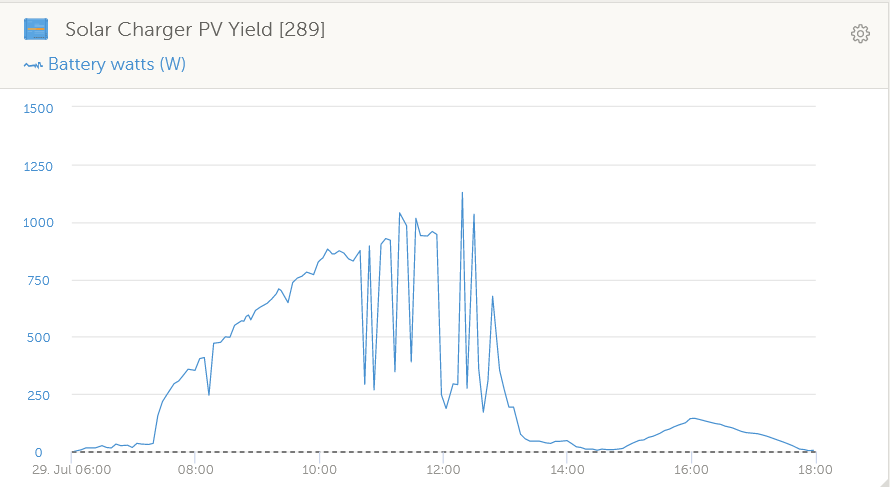
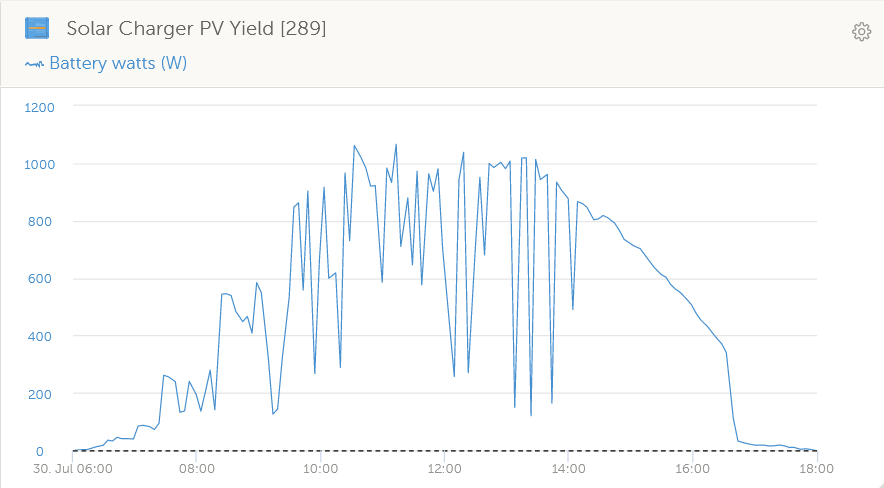

In [ ]:
Energy_cell_fix = np.round(np.trapz(test1['Pot_Cell4_Fix']),3)
Energy_cell_ct = np.round((np.trapz(test1['Pot_cell1_CT'])),3)
Energy_cell_2p = np.round((np.trapz(test1['Pot_Cell3_2P'])),3)
Energy_cell_4p = np.round((np.trapz(test1['Pot_Cell2_4P'])),3)
Gain_cell_ct = (Energy_cell_ct/Energy_cell_fix - 1)*100
Gain_cell_2p = (Energy_cell_2p/Energy_cell_fix - 1)*100
Gain_cell_4p = (Energy_cell_4p/Energy_cell_fix - 1)*100
print('Gain continuous: ', np.round(Gain_cell_ct,2), '% Gain 2 positions: ', np.round(Gain_cell_2p,2), '% Gain 4 positions: ', np.round(Gain_cell_4p,2),'%')


Gain continuous:  19.02 % Gain 2 positions:  9.82 % Gain 4 positions:  11.35 %


In [ ]:

Energy_cell_fix = np.round(np.trapz(test1['Pot_Cell4_Fix']),3)
Energy_cell_ct = np.round((np.trapz(test1['Pot_cell1_CT'])),3)
Energy_cell_2p = np.round((np.trapz(test1['Pot_Cell3_2P'])),3)
Energy_cell_4p = np.round((np.trapz(test1['Pot_Cell2_4P'])),3)
Gain_cell_ct = (Energy_cell_ct/Energy_cell_fix - 1)*100
Gain_cell_2p = (Energy_cell_2p/Energy_cell_fix - 1)*100
Gain_cell_4p = (Energy_cell_4p/Energy_cell_fix - 1)*100
print('Gain continuous: ', np.round(Gain_cell_ct,2), '% Gain 2 positions: ', np.round(Gain_cell_2p,2), '% Gain 4 positions: ', np.round(Gain_cell_4p,2),'%')

Gain continuous:  11.68 % Gain 2 positions:  1.98 % Gain 4 positions:  2.52 %


In [ ]:
from google.colab import files
files.upload()
test1 = pd.read_csv('DATALOG_g.CSV',delimiter=',',encoding='utf-8')
time_datalog = pd.to_datetime(test1['Data'])
test1


Saving DATALOG_g.CSV to DATALOG_g.CSV


,Data,Voc_cell1_Fix,Isc_cell1_Fix,Voc_cell2_3P,Isc_cell2_3P,Unnamed: 5
0,06:42:03 12/08/2021,0.909,0.052,0.996,0.060,
1,06:43:04 12/08/2021,0.916,0.054,1.001,0.060,
2,06:44:04 12/08/2021,0.920,0.058,1.006,0.064,
3,06:45:04 12/08/2021,0.924,0.058,1.010,0.066,
4,06:46:05 12/08/2021,0.929,0.064,1.014,0.072,
...,...,...,...,...,...,...
639,17:26:19 12/08/2021,1.005,0.275,1.098,0.500,
640,17:27:19 12/08/2021,1.005,0.270,1.098,0.496,
641,17:28:20 12/08/2021,1.005,0.278,1.098,0.495,
642,17:29:20 12/08/2021,1.005,0.275,1.099,0.498,


<Figure size 432x288 with 0 Axes>

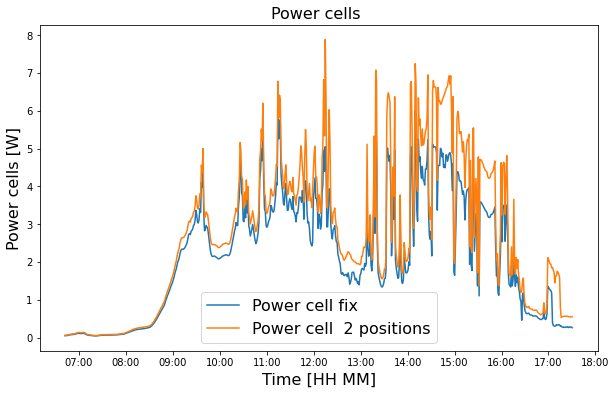

In [ ]:
test1['Pot_cell1_Fix'] = test1['Voc_cell1_Fix']*test1['Isc_cell1_Fix']
test1['Pot_cell2_3P'] = test1['Voc_cell2_3P']*test1['Isc_cell2_3P']
#df[list(df)[1:] < 0] = 0
#list(ineichen)[3:]))
#solpos = solpos.loc[solpos['apparent_elevation'] > 0, :]

#df = df[list(df)[1:]].clip(lower = 0)
#df

test1
plt.figure()
plt.subplots(figsize=(10, 6))
plt.plot(time_datalog, test1['Pot_cell1_Fix'], label = 'Power cell fix')
plt.plot(time_datalog, test1['Pot_cell2_3P'], label = 'Power cell  2 positions')


myFmt = mdates.DateFormatter('%H:%M')
plt.gca().xaxis.set_major_formatter(myFmt)
plt.legend(loc = 'lower center',fontsize = 10)
plt.xlabel('Time [HH MM]', fontsize = 16)
plt.ylabel('Power cells [W]', fontsize = 16)
plt.title('Power cells ', fontsize = 16) 
plt.legend(loc='lower center', fontsize = 16)
plt.show()
